## Name: Michael Osei
***

### Question 0

[[0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


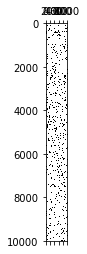

In [83]:
%matplotlib inline
import numpy as np
from time import time
import matplotlib.pyplot as plt

nr_points = 10000
nr_features = 1000

X = np.random.binomial(n=1, p=0.1, size=(nr_points, nr_features))
print(X[:5,:5])
plt.spy(X)


### Question 1

In [84]:
from sklearn import naive_bayes 

y = np.random.randint(0, 3, nr_points)
print(y)

[2 2 2 ..., 0 1 2]


### Question 2

In [85]:
clf = naive_bayes.BernoulliNB()
start = time()
clf.fit(X, y)
t1 = time() - start
print("t1 = {:0.5f} seconds".format(t1))

t1 = 0.26019 seconds


### Question 3

In [91]:
from scipy.sparse import csr_matrix

X_sparse = csr_matrix(X)
clf = naive_bayes.BernoulliNB()
start = time()
clf.fit(X_sparse, y)
t2 = time() - start
print("t2 = {:0.5f} seconds".format(t2))

print("Sparse matrices are x{:.0f} faster".format((t1/t2)))

t2 = 0.02048 seconds
Sparse matrices are x13 faster


### Question 6

In [143]:
nr_feat = 900

y = np.array([0]*nr_points + [1]*nr_points + [2]*nr_points)

LO = np.zeros((nr_points, nr_feat//3), 'int8')
ME = np.zeros((nr_points, nr_feat//3), 'int8')
HI = np.zeros((nr_points, nr_feat//3), 'int8')

for i in range(nr_feat//3):
    LO[:,i] = np.random.binomial(n=1, p=float((i+1)/(i+2))/100, size=nr_points)    
    ME[:,i] = np.random.binomial(n=1, p=float((i+1)*2/(i+2))/100, size=nr_points)    
    HI[:,i] = np.random.binomial(n=1, p=float((i+1)*4/(i+2))/100, size=nr_points)
    
block1 = np.hstack((LO, ME, HI))
block2 = np.hstack((HI, LO, ME))
block3 = np.hstack((ME, HI, LO))
X = np.vstack((block1, block2, block3))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

clf = naive_bayes.BernoulliNB()
clf.fit(X_train, y_train)
print("{:.2f}%".format(clf.score(X_train, y_train) * 100))
clf.fit(X_train, y_train)
print("{:.2f}%".format(clf.score(X_test, y_test) * 100))

97.24%
97.12%
